### **Progetto Algoritmi 2023**
*Bagnolini Tommaso*

----------

**Consegna:**

Si scriva un programma python che legge da file csv la matrice di adiacenza di un grafo e:
1) determina se il grafo corrispondente è orientato o non orientato
2) applica sul grafo un algoritmo compatibile non banale scelto fra quelli presentati a lezione (BFS, DFS,
Kruskal, Prim, Dijkstra, Bellman-Ford, … )

----

**Importazione dei moduli necessari:**

In [1]:
import random
import numpy as np
import csv
import matplotlib.pyplot as plt
import networkx as nx

---

**Obiettivi:**
1) Leggere un file csv e copiarlo in una variabile
2) Verificare l'orientamento del grafo
3) Rappresentare il grafo
4) Applicare un algoritmo non banale sul grafo

---

**Per garantire situazioni differenti ad ogni ripetizione dl codice, ho deciso di creare run-time il file della matrice di adiacenza tramite il modulo random e la scrittra su CSV**
###### *il file viene salvato in 'matrice_adiacenza.csv'*

In [2]:
dimensione=5
matrice_adiacenza = [[0] * dimensione for _ in range(dimensione)]  # Inizializzazione di una matrice vuota
for i in range(dimensione):
    for j in range(dimensione):
        if i != j:  # Imposta il peso solo se non si tratta del nodo stesso
            peso_arco = random.randint(1, 2) 
            matrice_adiacenza[i][j] = peso_arco

# Salvataggio dei dati della matrice di adiacenza in un file CSV
with open('matrice_adiacenza.csv', mode='w', newline='') as file_csv:
    writer = csv.writer(file_csv)
    writer.writerows(matrice_adiacenza)

--- 

**Procedo quindi a leggere il contenuto del file "matrice_adiacenza.csv" appena generato e lo salvo dentro ad un array numpy monodimensionale che chiamo 'mat'**

In [3]:
def csv_read(file_path):
    mat=[]
    with open(file_path, 'r') as csvfile:
        reader=csv.reader(csvfile)
        for row in reader:
            mat.append([int(value) for value in row])
    return np.array(mat)

---

**Creo quindi un grafo a partire dall matrice generata precedentemente**

In [4]:
def crea_grafo_da_matrice(matrice):
    grafo = {}
    numero_nodi = len(matrice)
    for i in range(numero_nodi):
        nodi_adiacenti = []
        for j in range(numero_nodi):
            if matrice[i][j] == 1:
                nodi_adiacenti.append(j)
        grafo[i] = nodi_adiacenti
    return grafo

---

**Creo una funzione per stampare in output il grafo, in modo tale da poterne visualizzare il contenuto**

In [5]:
def stampa_grafo(grafo):
    for nodo, adiacenti in grafo.items():
        print(f"Nodo {nodo}: {adiacenti}")

---

**A questo punto creo 2 funzioni di rappresentazione grafica del grafo**
###### Essendo che la differenza tra orientato e non richiede due metodi di rappresentazione differenti, è necessario creare 2 funzioni separate

In [6]:
def graphical_graph_oriented(grafo):
    grafo=nx.MultiDiGraph(grafo)
    pos = nx.spring_layout(grafo, seed=42)  # Posizione dei nodi nel grafico
    nx.draw(grafo, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_weight='bold', width=1, edge_color='gray', arrows=True, arrowsize=15, arrowstyle='-|>')
    plt.show()

In [7]:
def graphical_graph_not_oriented(grafo):
    grafo=nx.Graph(grafo)
    pos = nx.spring_layout(grafo, seed=42)  # Posizione dei nodi nel grafico
    nx.draw(grafo, pos, with_labels=True, node_color='skyblue', node_size=1500, font_size=12, font_weight='bold', width=1, edge_color='black', arrows=False, arrowsize=15, arrowstyle='-|>')
    plt.show()

---

**Creo quindi una funzione per verificare se il grafo sia ORIENTATO o NON ORIENTATO, a seconda che la matrice precedentemente creata sia simmetrica rispetto alla diagonale principale**
###### Per il controllo verifico se la matrice corrisponde alla sua trasposta usando la funzione '.T' del modulo numpy

In [8]:
def isOriented(matrix, graph):
    # Controllo se la matrice è simmetrica (se coincide con la sua trasposta)
    if np.array_equal(matrix, matrix.T):
        print("Il grafo e' NON ORIENTATO")
        print(f"Rappresentazione grafica...\n")
        graphical_graph_not_oriented(graph)
    else:
        print("Il grafo è ORIENTATO")
        print(f"Rappresentazione grafica...\n")
        graphical_graph_oriented(graph)

---

**Applico quindi l'algoritmo di Dijkstra, la cui funzione è quella di garantire la determinazione del cammino più breve da un nodo di partenza a tutti gli altri nodi con pesi non negativi**


In [9]:
def dijkstra(graph, start_node):
    # Inizializzazione dei dizionari per i costi minimi e i predecessori
    inf = float('inf')
    costo_minimo = {nodo: inf for nodo in graph}
    predecessore = {nodo: None for nodo in graph}
    costo_minimo[start_node] = 0
    
    # Inizializzazione della lista dei nodi da visitare
    nodi_da_visitare = list(graph.keys())
    
    while nodi_da_visitare:
        # Trova il nodo con il costo minimo tra i nodi da visitare
        nodo_corrente = min(nodi_da_visitare, key=lambda nodo: costo_minimo[nodo])
        nodi_da_visitare.remove(nodo_corrente)
        
        # Aggiorna i costi minimi e i predecessori per i nodi adiacenti
        for nodo_adiacente in graph[nodo_corrente]:
            nuovo_costo = costo_minimo[nodo_corrente] + 1 # Assumendo che ogni arco abbia un costo di 1
            if nuovo_costo < costo_minimo[nodo_adiacente]:
                costo_minimo[nodo_adiacente] = nuovo_costo
                predecessore[nodo_adiacente] = nodo_corrente
    
    return costo_minimo, predecessore

---

**Salvo il percorso del file contenente la matrice all'interno di una varaibile**

In [10]:
file_path='matrice_adiacenza.csv'

---

**Richiamo quindi la funzione 'csv_read' creata in precedenza per leggere il conetnuto di 'file_path' e salvarlo all'interno della variabile 'matrix'**

In [11]:
matrix=csv_read(file_path)
print(f"La matrice letta da csv e':\n {matrix}\n")

La matrice letta da csv e':
 [[0 2 1 2 2]
 [2 0 1 2 1]
 [2 1 0 2 1]
 [2 1 1 0 2]
 [2 1 1 2 0]]



---

**Istanzio un nuovo grafo utilizzando la matrice**

In [12]:
graph=crea_grafo_da_matrice(matrix)
print(f"Il grafo relativo possiede i seguenti nodi:\n {graph}\n")

Il grafo relativo possiede i seguenti nodi:
 {0: [2], 1: [2, 4], 2: [1, 4], 3: [1, 2], 4: [1, 2]}



---

**Tramite la funzione 'isOriented()' verifico l'orientamento del grafo e lo rappresento graficamente tramite le funzioni del modulo python 'networkx'**

Il grafo è ORIENTATO
Rappresentazione grafica...



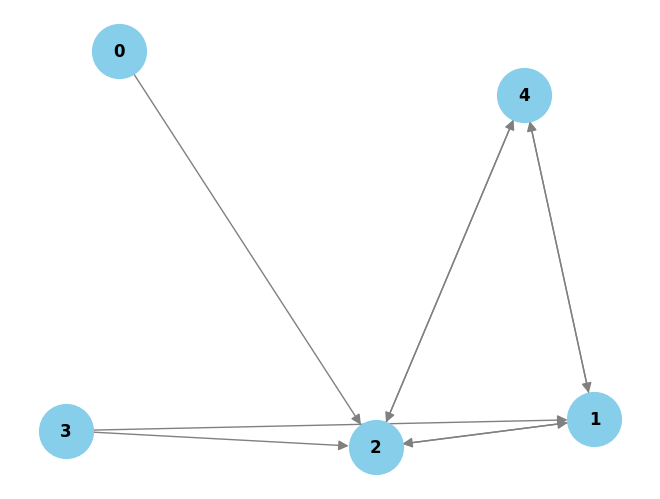

In [13]:
isOriented(matrix, graph)

---

**Dichiaro i 3 parametri che mi servireanno per poter utilizzare l'algoritmo di Dijkstra**

In [14]:
start_node = 0  # Specifica il nodo di partenza per l'algoritmo di Dijkstra
costo_minimo, predecessore = dijkstra(graph, start_node)

---

**Infine stampo i risultati ottenuti tramite l'applicazione dell'algoritmo di Dijkstra**

In [15]:
print(f"Distanze più brevi dei vari nodi rispetto al nodo [ {start_node} ]:")
print("Nodo\tCosto Minimo\tPredecessore")
for nodo, costo in costo_minimo.items():
    predecessore_nodo = predecessore[nodo]
    print(f"{nodo} \t{costo} \t\t{predecessore_nodo}")

Distanze più brevi dei vari nodi rispetto al nodo [ 0 ]:
Nodo	Costo Minimo	Predecessore
0 	0 		None
1 	2 		2
2 	1 		0
3 	inf 		None
4 	2 		2
